# Assignment-3 - Text Based Analysis
## Text Analytics, Social Media Scrapping
### krishna , SHU ID 0916341

#### Data Collection from the web
Data can be collected using APIs, specifically  for social media 

Data can be “Scrapped” from any website (using scrapy & Regularexpressions)

## Authentication

In [1]:
# Install the PRAW library
!pip install praw
# Upgrade pip to the latest version
!pip install --upgrade pip
# Import the PRAW library
import praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="BB3Y91DIn_izYlWCqIM2xw",
    client_secret="p-GNweZQhLOKHVq1Zf4XhbrlZ2vC0Q",
    user_agent=user_agent
)

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/8a/6a/19e9fe04fca059ccf770861c7d5721ab4c2aebc539889e97c7977528a53b/pip-24.0-py3-none-any.whl.metadata
  Using cached pip-24.0-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.0-py3-none-any.whl (2.1 MB)


ERROR: To modify pip, please run the following command:
C:\ProgramData\anaconda3\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import re #RegEx : Regular expression

## Get Trending Topic from your Subreddit

The **"NBA"** subreddit channel will be use for this project

In [3]:
# Hot new rising topics

headlines = set()
for submission in reddit.subreddit("NBA").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

Daily Discussion Thread + Game Thread Index
1bh3xn3
NBA_MOD
1710698402.0
6
0.88
https://www.reddit.com/r/nba/comments/1bh3xn3/daily_discussion_thread_game_thread_index/
0


**Get total comment in Subreddit**

In [5]:
headlines = set()
for submission in reddit.subreddit("NBA").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

738


### Create a dataframe from the scrapped data

In [6]:
NBA_df = pd.DataFrame(headlines)
NBA_df.head()

0
0  Is Dwyane Wade and Dirk Nowitzki in your Top 2...
1              Most Underrated Player in the League?
2  [Slater] Steve Kerr details the “bizarre” endi...
3  [Highlight] Deni Avdija with a quick dunk to p...
4  For fans in countries that don't do daylight s...

### columns

In [7]:
NBA_df.columns

RangeIndex(start=0, stop=1, step=1)

In [8]:
NBA_df.columns = ['Titles']
NBA_df.head()

Titles
0  Is Dwyane Wade and Dirk Nowitzki in your Top 2...
1              Most Underrated Player in the League?
2  [Slater] Steve Kerr details the “bizarre” endi...
3  [Highlight] Deni Avdija with a quick dunk to p...
4  For fans in countries that don't do daylight s...

### Next we have to remove emoji & Unicode from the reddit data.

In [9]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
NBA_df["Titles"]= NBA_df["Titles"].apply(remove_emoji)

#Show the clean text
NBA_df.head()

Titles
0  Is Dwyane Wade and Dirk Nowitzki in your Top 2...
1              Most Underrated Player in the League?
2  [Slater] Steve Kerr details the “bizarre” endi...
3  [Highlight] Deni Avdija with a quick dunk to p...
4  For fans in countries that don't do daylight s...

## Remove Stop words

In [10]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

# Download English stopwords
nltk.download('stopwords')

# Define the remove_stop function
def remove_stop(tokens):
    stopwords = set(nltk.corpus.stopwords.words('english'))
    return [t for t in tokens if t.lower() not in stopwords]

# Assuming you have already defined the cancer_df DataFrame
# If not, replace the following line with the actual DataFrame creation code
# cancer_df = pd.DataFrame(headlines)

# Tokenize and remove stop words
NBA_df['clean_tokens'] = NBA_df['Titles'].apply(lambda x: remove_stop(word_tokenize(str(x))))

# Display the DataFrame with the cleaned tokens
print(NBA_df[['Titles', 'clean_tokens']].tail())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\geeth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                Titles  \
733  Why are role players not capable of being the ...   
734  [Clark] Willie Green on Zion: “Quite frankly, ...   
735         Devin Booker on Why He Talks So Much Trash   
736  “I thought he should have been suspended. … Th...   
737  Domantas Sabonis is now 7 consecutive double d...   

                                          clean_tokens  
733         [role, players, capable, Steals, Champ, ?]  
734  [[, Clark, ], Willie, Green, Zion, :, “, Quite...  
735                [Devin, Booker, Talks, Much, Trash]  
736  [“, thought, suspended, ., …, one, thing, neve...  
737  [Domantas, Sabonis, 7, consecutive, double, do...  


## Function to remove stop words

In [11]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

# Download English stopwords
nltk.download('stopwords')

# Define the remove_stop function
def remove_stop(tokens):
    stopwords = set(nltk.corpus.stopwords.words('english'))
    return [t for t in tokens if t.lower() not in stopwords]

# Assuming you have already defined the cancer_df DataFrame
# If not, replace the following line with the actual DataFrame creation code
# cancer_df = pd.DataFrame(headlines)

# Tokenize and remove stop words
NBA_df['clean_tokens'] = NBA_df['Titles'].apply(lambda x: remove_stop(word_tokenize(str(x))))

# Display the DataFrame with the cleaned tokens
print(NBA_df[['Titles', 'clean_tokens']].tail())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\geeth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                Titles  \
733  Why are role players not capable of being the ...   
734  [Clark] Willie Green on Zion: “Quite frankly, ...   
735         Devin Booker on Why He Talks So Much Trash   
736  “I thought he should have been suspended. … Th...   
737  Domantas Sabonis is now 7 consecutive double d...   

                                          clean_tokens  
733         [role, players, capable, Steals, Champ, ?]  
734  [[, Clark, ], Willie, Green, Zion, :, “, Quite...  
735                [Devin, Booker, Talks, Much, Trash]  
736  [“, thought, suspended, ., …, one, thing, neve...  
737  [Domantas, Sabonis, 7, consecutive, double, do...  


## Pipeline

In [12]:
# Fetch Reddit data
headlines = []
for submission in reddit.subreddit("NBA").hot(limit=None):
    headlines.append(submission.title)

# Create DataFrame from Reddit data
NBA_df = pd.DataFrame({'Titles': headlines})

# Define the pipeline
def remove_stop(tokens):
    stopwords = set(nltk.corpus.stopwords.words('english'))
    return [t for t in tokens if t.lower() not in stopwords]

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = remove_stop(tokens)
    return tokens

# Apply the pipeline to the 'Titles' column
NBA_df['clean_tokens'] = NBA_df['Titles'].apply(preprocess_text)

# Display the DataFrame with the processed tokens
print(NBA_df[['Titles', 'clean_tokens']].head())

                                              Titles  \
0        Daily Discussion Thread + Game Thread Index   
1  [SERIOUS NEXT DAY THREAD] Post-Game Discussion...   
2  [Highlight] Bobby Portis drains back-to-back t...   
3  The Bucks put up 82 points in the first half a...   
4  [Wojnarowski] Milwaukee Bucks star Giannis Ant...   

                                        clean_tokens  
0  [daily, discussion, thread, +, game, thread, i...  
1  [[, serious, next, day, thread, ], post-game, ...  
2  [[, highlight, ], bobby, portis, drains, back-...  
3  [bucks, put, 82, points, first, half, sun, ,, ...  
4  [[, wojnarowski, ], milwaukee, bucks, star, gi...  


In [13]:
print(NBA_df['clean_tokens'].head())

0    [daily, discussion, thread, +, game, thread, i...
1    [[, serious, next, day, thread, ], post-game, ...
2    [[, highlight, ], bobby, portis, drains, back-...
3    [bucks, put, 82, points, first, half, sun, ,, ...
4    [[, wojnarowski, ], milwaukee, bucks, star, gi...
Name: clean_tokens, dtype: object


In [14]:
!pip install textblob
!pip install wordcloud


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


### Create a function to get the subjectivity

In [17]:
# Ensure textblob is installed
!pip install textblob

import pandas as pd
from textblob import TextBlob

# Mock-up: Assuming NBA_df is defined here with a column 'Titles'
# NBA_df = pd.DataFrame({'Titles': ['Great win today!', 'Tough loss last night', ...]})

# Define functions for sentiment analysis
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Apply the functions to create new columns in the DataFrame
NBA_df['Subjectivity'] = NBA_df['Titles'].apply(getSubjectivity)
NBA_df['Polarity'] = NBA_df['Titles'].apply(getPolarity)

# Display the modified DataFrame
print(NBA_df.head())


Defaulting to user installation because normal site-packages is not writeable
                                              Titles  \
0        Daily Discussion Thread + Game Thread Index   
1  [SERIOUS NEXT DAY THREAD] Post-Game Discussion...   
2  [Highlight] Bobby Portis drains back-to-back t...   
3  The Bucks put up 82 points in the first half a...   
4  [Wojnarowski] Milwaukee Bucks star Giannis Ant...   

                                        clean_tokens  Subjectivity  Polarity  
0  [daily, discussion, thread, +, game, thread, i...      0.200000 -0.200000  
1  [[, serious, next, day, thread, ], post-game, ...      0.333333 -0.166667  
2  [[, highlight, ], bobby, portis, drains, back-...      0.000000  0.000000  
3  [bucks, put, 82, points, first, half, sun, ,, ...      0.291667  0.104167  
4  [[, wojnarowski, ], milwaukee, bucks, star, gi...      0.000000  0.000000  


## Data Visualization

In [18]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127897 (\N{STUDIO MICROPHONE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


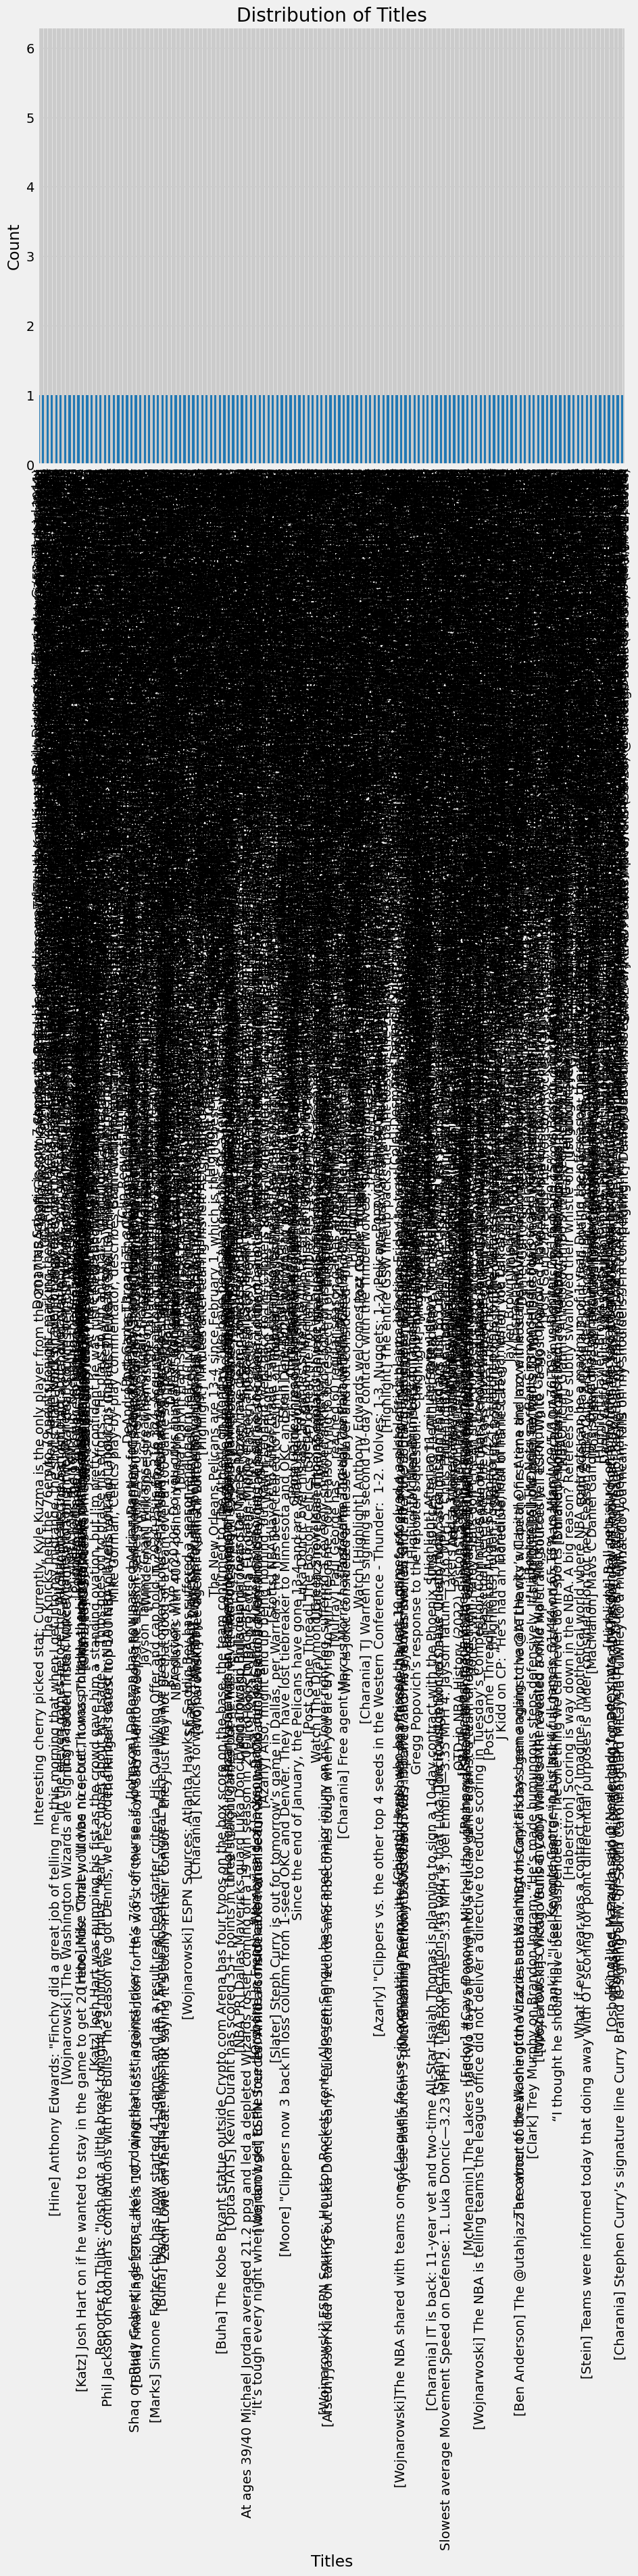

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
NBA_df["Titles"].value_counts().plot(kind="bar", color="#2078B4")
plt.xlabel("Titles")
plt.ylabel("Count")
plt.title("Distribution of Titles")
plt.show()



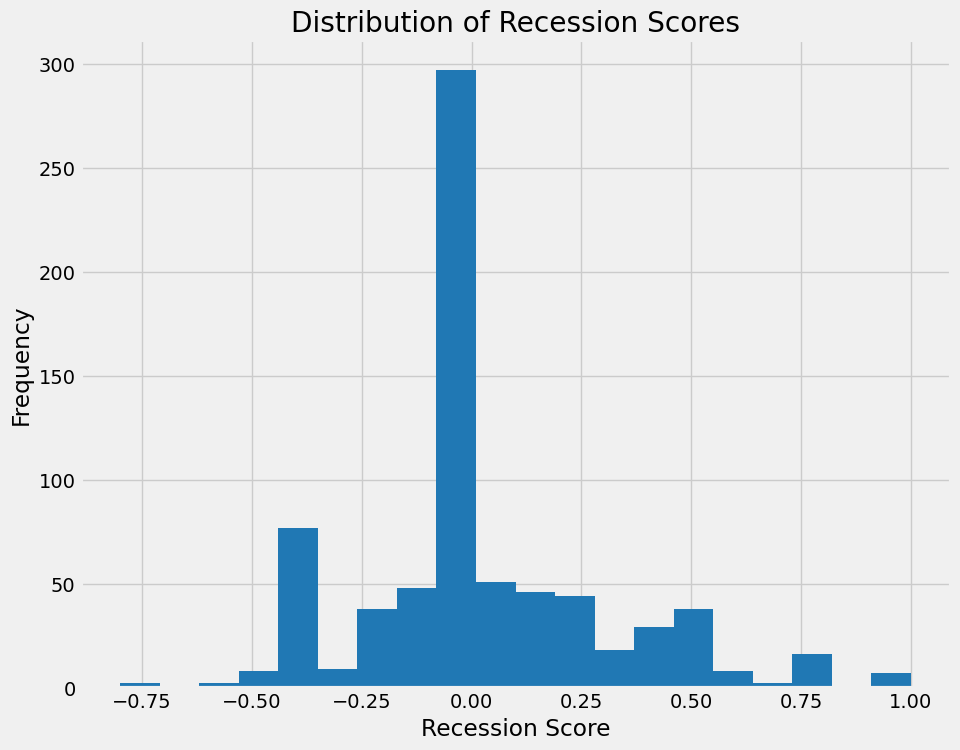

In [21]:
plt.figure(figsize=(10, 8))
NBA_df["Polarity"].plot(kind="hist", bins=20, color="#2078B4")
plt.xlabel("Recession Score")
plt.ylabel("Frequency")
plt.title("Distribution of Recession Scores")
plt.show()


# Wordcloud

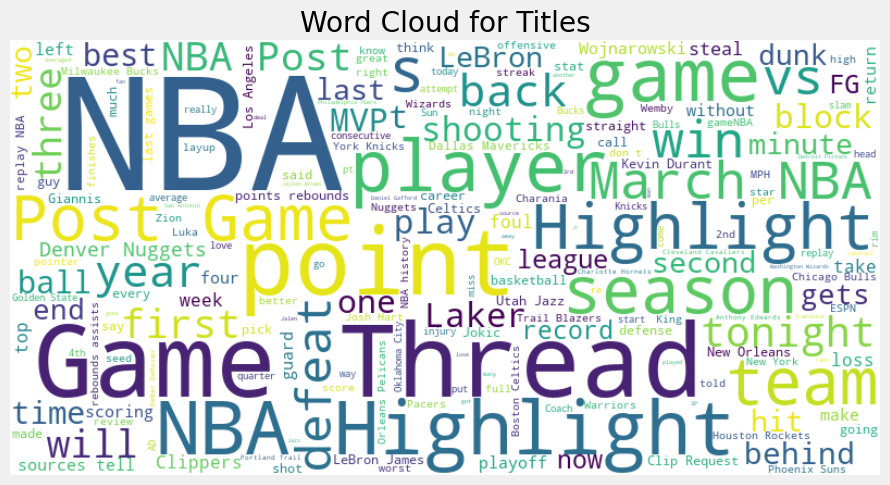

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate text values from the "Titles" column
text = 'NBA '.join(NBA_df["Titles"].astype(str))

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Titles")
plt.show()



## wordcloud theme in pistol shape

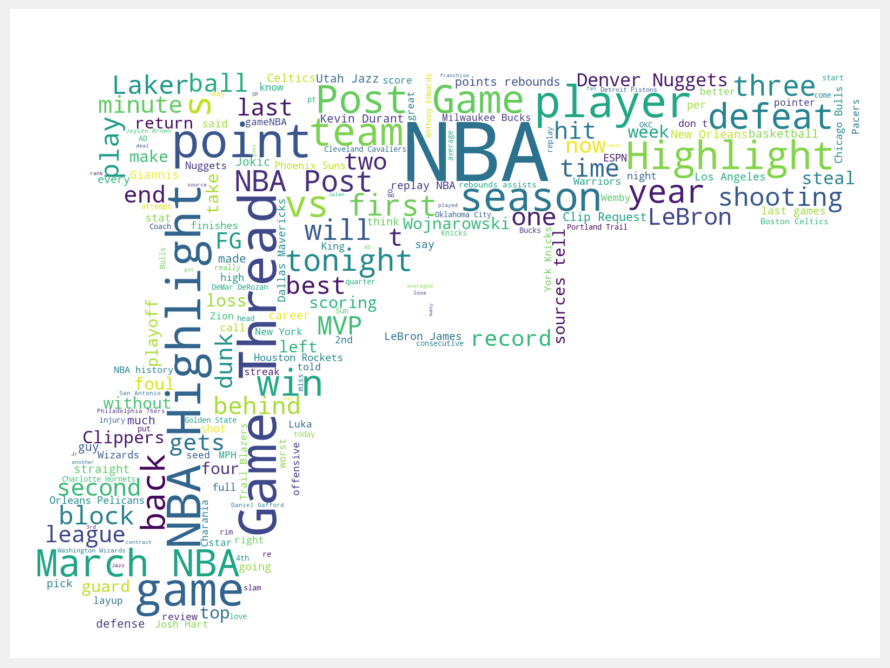

In [23]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image

# Read the gun-shaped mask image
gun_mask = np.array(Image.open("C:/Users/geeth/OneDrive/Desktop/gun.jpeg"))

# Concatenate text values from the "Titles" column
text = 'NBA '.join(NBA_df["Titles"].astype(str))

# Create WordCloud with the gun-shaped mask
wc = WordCloud(mask=gun_mask, background_color='white', contour_width=0, contour_color='black').generate(text)

# Display the WordCloud
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()



# wordcloud theme in rifles shape¶

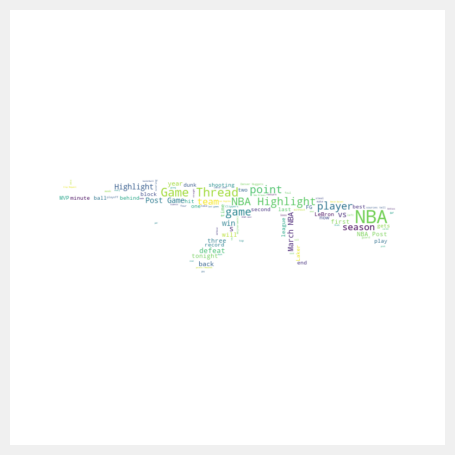

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Read the gun-shaped mask image
gun_mask = np.array(Image.open("C:/Users/geeth/OneDrive/Desktop/ak.webp"))

# Generate the word cloud using the gun-shaped mask
wordcloud = WordCloud(mask=gun_mask, contour_color='steelblue', background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(5,8 ))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


### Get the Bing liu Lexicon

In [25]:
import nltk
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize
import pandas as pd

# Download the Opinion Lexicon
nltk.download('opinion_lexicon')

# Assuming you have a DataFrame named bitcoin_df with a 'Titles' column
# Replace 'Titles' with your actual column name if different

# Tokenize and calculate sentiment scores
NBA_df['clean_tokens'] = NBA_df['Titles'].apply(lambda x: word_tokenize(str(x)))
NBA_df['positive_score'] = NBA_df['clean_tokens'].apply(lambda tokens: sum(1 for word in tokens if word in opinion_lexicon.positive()))
NBA_df['negative_score'] = NBA_df['clean_tokens'].apply(lambda tokens: sum(1 for word in tokens if word in opinion_lexicon.negative()))

# Calculate a sentiment score (positive - negative)
NBA_df['sentiment_score'] = NBA_df['positive_score'] - NBA_df['negative_score']

# Display the DataFrame with sentiment scores
print(NBA_df[['Titles', 'positive_score', 'negative_score', 'sentiment_score']].head())

[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     C:\Users\geeth\AppData\Roaming\nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


                                              Titles  positive_score  \
0        Daily Discussion Thread + Game Thread Index               0   
1  [SERIOUS NEXT DAY THREAD] Post-Game Discussion...               0   
2  [Highlight] Bobby Portis drains back-to-back t...               0   
3  The Bucks put up 82 points in the first half a...               0   
4  [Wojnarowski] Milwaukee Bucks star Giannis Ant...               0   

   negative_score  sentiment_score  
0               0                0  
1               0                0  
2               1               -1  
3               0                0  
4               0                0  


In [26]:
# Print the DataFrame
print(NBA_df)

# Print summary information
print(NBA_df.info())


                                                Titles  \
0          Daily Discussion Thread + Game Thread Index   
1    [SERIOUS NEXT DAY THREAD] Post-Game Discussion...   
2    [Highlight] Bobby Portis drains back-to-back t...   
3    The Bucks put up 82 points in the first half a...   
4    [Wojnarowski] Milwaukee Bucks star Giannis Ant...   
..                                                 ...   
737  Lebron James with an efficient 29 points 8 reb...   
738  [Wojnarowski] Free agent F Darius Bazley is pl...   
739  [Highlight] Sengun lands awkwardly and grabs h...   
740                               Gift for NBA player    
741  GAME THREAD: Dallas Mavericks (36-28) @ Chicag...   

                                          clean_tokens  Subjectivity  \
0    [Daily, Discussion, Thread, +, Game, Thread, I...      0.200000   
1    [[, SERIOUS, NEXT, DAY, THREAD, ], Post-Game, ...      0.333333   
2    [[, Highlight, ], Bobby, Portis, drains, back-...      0.000000   
3    [The, Buck